In [3]:
from skimage import feature
from imutils import paths
import numpy as np
import argparse
import cv2 as cv
import os
import pandas as pd
from google.colab.patches import cv2_imshow

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [4]:
dataset_dir = '/content/drive/My Drive/Datasets/parkinsons/wave'

trainingPath = os.path.join(dataset_dir, "training")
testingPath = os.path.join(dataset_dir, "testing")

In [5]:
def preprocess(image, image_size=128):
		image = cv.cvtColor(image, cv.COLOR_BGR2GRAY) # Ubah mehjadi grayscale
		image = cv.resize(image, (image_size, image_size)) # Resize gambar menjadi suatu ukuran (default = 128)

		image = cv.threshold(image, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1] # Melakukan thresholding dan mengambil hasil gambar thresholding

		return image

In [6]:
def quantify_image_hog(image): # Histogram of Oriented Gradient features
	features = feature.hog(image, orientations=9, pixels_per_cell=(10, 10), cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1")

	return features

In [7]:
def quantify_image_lbp(image): # Local Binary Pattern features
  features = feature.local_binary_pattern(image, 24, 8, method="uniform")

  (hist, _) = np.histogram(features.flatten(), bins=np.arange(0, 27), range=(0, 26))

  hist = hist.astype("float")
  hist /= (hist.sum() + 1e-7)

  return hist

In [8]:
def load_split(path, image_size=200, extraction_method='hog'):
	image_paths = list(paths.list_images(path))
	data = []
	labels = []

	for image_path in image_paths:
		label = image_path.split(os.path.sep)[-2]

		image = cv.imread(image_path)
		image = preprocess(image, image_size=image_size)
		
		if extraction_method == 'hog':
			features = quantify_image_hog(image)
		elif extraction_method == 'lbp':
			features = quantify_image_lbp(image)

		data.append(features)
		labels.append(label)

	return (np.array(data), np.array(labels))

In [14]:
resize_image_size = 128 # Masing-masing gambar perlu diresize menjadi suatu ukuran yang tetap
extraction_method = 'hog' # 'lbp' atau 'hog'

In [9]:
def model_train(resize_image_size, extraction_method, estimator):
  (feature_train, label_train) = load_split(trainingPath, image_size=resize_image_size, extraction_method=extraction_method)
  (feature_test, label_test) = load_split(testingPath, image_size=resize_image_size, extraction_method=extraction_method)
  # print("Data loaded!")

  le = LabelEncoder()
  label_train = le.fit_transform(label_train)
  label_test = le.transform(label_test)

  #LOGISTIC REGRESSION
  logreg = LogisticRegression()
  logreg.fit(feature_train, label_train)
  predictions = logreg.predict(feature_test)

  print('Logistic Regression')
  print('Akurasi dari Testing Set: {:.3f}'.format(logreg.score(feature_test, label_test))) # .score() -> Accuracy
  print("f1 score ", f1_score(label_test, predictions, average='macro'))
  print("precision score ", precision_score(label_test, predictions, average='macro'))
  print("recall score ", recall_score(label_test, predictions, average='macro'))
  print()

  #LinearSVC 
  classifier_linear_svc = SVC()
  classifier_linear_svc.fit(feature_train, label_train)
  predictions = classifier_linear_svc.predict(feature_test)

  print('LinearSVC')
  print('Akurasi dari Testing Set: {:.3f}'.format(classifier_linear_svc.score(feature_test, label_test))) # .score() -> Accuracy
  print("f1 score ", f1_score(label_test, predictions, average='macro'))
  print("precision score ", precision_score(label_test, predictions, average='macro'))
  print("recall score ", recall_score(label_test, predictions, average='macro'))
  print()

  #RANDOM FOREST
  random_forest = RandomForestClassifier(n_estimators=estimator, random_state=10)
  random_forest.fit(feature_train, label_train)
  predictions = random_forest.predict(feature_test)

  print('Random Forest Classifier')
  print('Akurasi dari Testing Set: {:.3f}'.format(random_forest.score(feature_test, label_test))) # .score() -> Accuracy
  print("f1 score ", f1_score(label_test, predictions, average='macro'))
  print("precision score ", precision_score(label_test, predictions, average='macro'))
  print("recall score ", recall_score(label_test, predictions, average='macro'))
  print()


In [10]:
model_train(128, 'hog', 500)

Logistic Regression
Akurasi dari Testing Set: 0.633
f1 score  0.6228571428571429
precision score  0.6499999999999999
recall score  0.6333333333333333

LinearSVC
Akurasi dari Testing Set: 0.700
f1 score  0.6969696969696968
precision score  0.7083333333333333
recall score  0.7

Random Forest Classifier
Akurasi dari Testing Set: 0.633
f1 score  0.6228571428571429
precision score  0.6499999999999999
recall score  0.6333333333333333



In [ ]:
model_train(300, 'hog', 500)

Logistic Regression
Akurasi dari Testing Set: 0.700
f1 score  0.6996662958843158
precision score  0.7008928571428572
recall score  0.7

LinearSVC
Akurasi dari Testing Set: 0.700
f1 score  0.6996662958843158
precision score  0.7008928571428572
recall score  0.7

Random Forest Classifier
Akurasi dari Testing Set: 0.667
f1 score  0.6666666666666666
precision score  0.6666666666666666
recall score  0.6666666666666666



In [ ]:
model_train(128, 'lbp', 500)

Logistic Regression
Akurasi dari Testing Set: 0.500
f1 score  0.4994438264738599
precision score  0.5
recall score  0.5

LinearSVC
Akurasi dari Testing Set: 0.600
f1 score  0.569377990430622
precision score  0.639751552795031
recall score  0.6

Random Forest Classifier
Akurasi dari Testing Set: 0.567
f1 score  0.5661846496106784
precision score  0.5669642857142857
recall score  0.5666666666666667



In [ ]:
model_train(300, 'lbp', 500)

Logistic Regression
Akurasi dari Testing Set: 0.533
f1 score  0.5333333333333333
precision score  0.5333333333333333
recall score  0.5333333333333333

LinearSVC
Akurasi dari Testing Set: 0.567
f1 score  0.5542857142857143
precision score  0.575
recall score  0.5666666666666667

Random Forest Classifier
Akurasi dari Testing Set: 0.700
f1 score  0.6996662958843158
precision score  0.7008928571428572
recall score  0.7



In [15]:
testing_paths = list(paths.list_images(testingPath))
images = []

(feature_train, label_train) = load_split(trainingPath, image_size=resize_image_size, extraction_method=extraction_method)
(feature_test, label_test) = load_split(testingPath, image_size=resize_image_size, extraction_method=extraction_method)

le = LabelEncoder()
label_train = le.fit_transform(label_train)
label_test = le.transform(label_test)

random_forest = RandomForestClassifier(n_estimators=500, random_state=10)
random_forest.fit(feature_train, label_train)
# predictions = random_forest.predict(feature_test)

for testing_path in testing_paths[:25]:
	image = cv.imread(testing_path)
	output = image.copy()
	output = cv.resize(output, (128, 128))

	image = preprocess(image, image_size=128)

	if extraction_method == 'hog':
		features = quantify_image_hog(image)
	elif extraction_method == 'lbp':
		features = quantify_image_lbp(image)
   
	preds = random_forest.predict([features])
	label = le.inverse_transform(preds)[0]

	color = (0, 255, 0) if label == "healthy" else (0, 0, 255)
	cv.putText(output, label, (3, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
	images.append(output)

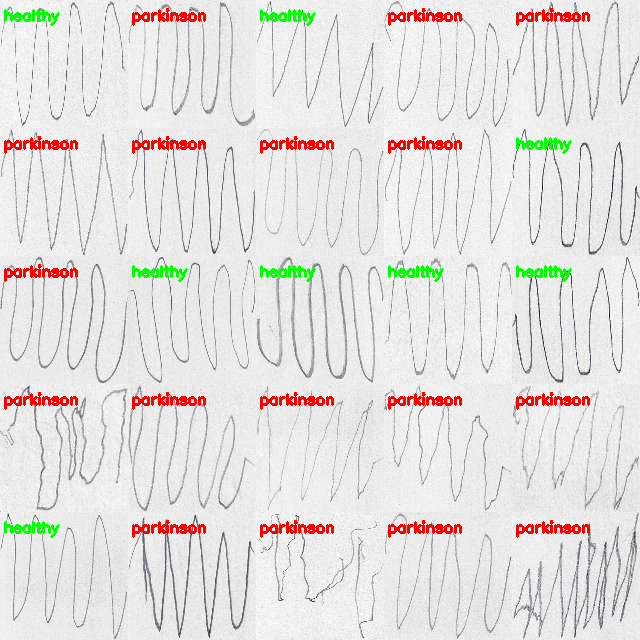

In [16]:
from imutils import build_montages

montage = build_montages(images, (128, 128), (5, 5))[0]

cv2_imshow(montage)

**Kesimpulan**

---

Dari hasil 3 algoritma yang digunakan dan 2 metode feature extraction, hasil paling baik itu didapatkan oleh model yang menggunakan Algoritma **Random Forest Classifier**, **ukuran gambar 128pixel** dengan feature extraction** Histogram of Oriented Gradients (HOG)** dan nilai **estimator 500** didapatkan Nilai **Akurasi 0.800** dan nilai **F1_score  0.799107**

**UNTUK SOAL NO 2, SAYA MENCOBA MENAMBAHKAN DATA NYA SECARA MANUAL**

In [ ]:
new_image = cv.imread('/content/drive/My Drive/Datasets/parkinsons/healthy.png')
new_image2 = cv.imread('/content/drive/My Drive/Datasets/parkinsons/parkinson.png')
cv2_imshow(new_image)
cv2_imshow(new_image2)

def gaus_filter(image, kernel):
  blur = cv.GaussianBlur(image, (kernel, kernel), 0)
  return blur

def median_filter(image, kernel):
  blur = cv.medianBlur(image, kernel)
  return blur

image_gray = cv.cvtColor(new_image, cv.COLOR_BGR2GRAY)
image_gray_blur = gaus_filter(image_gray, 3)
# image_gray_blur = median_filter(image_gray, 3)

# cv2_imshow(image_gray_blur)

thresholding_value, thresholding_result = cv.threshold(image_gray_blur, 100, 255, cv.THRESH_BINARY)

# cv2_imshow(thresholding_result)

thresholding_result = cv.bitwise_not(thresholding_result)

# cv2_imshow(thresholding_result)

dilation = cv.dilate(thresholding_result, (7,7), iterations = 15)
cv2_imshow(dilation)

Output hidden; open in https://colab.research.google.com to view.

disini awal nya saya mencoba dengan cara yang digunakan oleh Ricky, namun saat proses dilation yang saya lakukan hasil yang didapatkan masih putus-putus, padahal nilai iterations nya sudah lumayan besar, mungkin memang dari gambar yang saya bkin garis nya terlalu tipis. jadi akhir nya saya memutuskan untuk menginputkan secara manual


In [ ]:
dataset_dir = '/content/drive/My Drive/Datasets/parkinsons/wave'

trainingPath = os.path.join(dataset_dir, "training")
testingPath = os.path.join(dataset_dir, "testing")

In [ ]:
def model_train2(resize_image_size, extraction_method, estimator):
  (feature_train, label_train) = load_split(trainingPath, image_size=resize_image_size, extraction_method=extraction_method)
  (feature_test, label_test) = load_split(testingPath, image_size=resize_image_size, extraction_method=extraction_method)
  # print("Data loaded!")

  le = LabelEncoder()
  label_train = le.fit_transform(label_train)
  label_test = le.transform(label_test)

  #LOGISTIC REGRESSION
  logreg = LogisticRegression()
  logreg.fit(feature_train, label_train)
  predictions = logreg.predict(feature_test)

  print('Logistic Regression')
  print('Akurasi dari Testing Set: {:.3f}'.format(logreg.score(feature_test, label_test))) # .score() -> Accuracy
  print("f1 score ", f1_score(label_test, predictions, average='macro'))
  print("precision score ", precision_score(label_test, predictions, average='macro'))
  print("recall score ", recall_score(label_test, predictions, average='macro'))
  print()

  #LinearSVC 
  classifier_linear_svc = SVC()
  classifier_linear_svc.fit(feature_train, label_train)
  predictions = classifier_linear_svc.predict(feature_test)

  print('LinearSVC')
  print('Akurasi dari Testing Set: {:.3f}'.format(classifier_linear_svc.score(feature_test, label_test))) # .score() -> Accuracy
  print("f1 score ", f1_score(label_test, predictions, average='macro'))
  print("precision score ", precision_score(label_test, predictions, average='macro'))
  print("recall score ", recall_score(label_test, predictions, average='macro'))
  print()

  #RANDOM FOREST
  random_forest = RandomForestClassifier(n_estimators=estimator, random_state=10)
  random_forest.fit(feature_train, label_train)
  predictions = random_forest.predict(feature_test)

  print('Random Forest Classifier')
  print('Akurasi dari Testing Set: {:.3f}'.format(random_forest.score(feature_test, label_test))) # .score() -> Accuracy
  print("f1 score ", f1_score(label_test, predictions, average='macro'))
  print("precision score ", precision_score(label_test, predictions, average='macro'))
  print("recall score ", recall_score(label_test, predictions, average='macro'))
  print()


In [ ]:
model_train2(128, 'hog', 500)

Logistic Regression
Akurasi dari Testing Set: 0.633
f1 score  0.6228571428571429
precision score  0.6499999999999999
recall score  0.6333333333333333

LinearSVC
Akurasi dari Testing Set: 0.700
f1 score  0.6969696969696968
precision score  0.7083333333333333
recall score  0.7

Random Forest Classifier
Akurasi dari Testing Set: 0.700
f1 score  0.6969696969696968
precision score  0.7083333333333333
recall score  0.7



Pada saat ditambahkan 15 data training baru untuk healthy dan parkinson nya, saat dijalankan lagi model yang sebelumnya mendapatkan hasil paling baik sekarang nilai akurasi yang di hasilkan menjadi menurun, sebelum nya untuk Random Forest Classifier mendapatkan nilai akurasi 0.800 sekarang hanya 0.700. dari yang saya analisa kemungkinan hal ini terjadi karena gambar yang saya tambahkan kurang jelas atau gmna, sehingga model nya mendapatkan hasil yang kurang baik.